In [39]:
#Import Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(style='darkgrid',palette='viridis')
%matplotlib inline

In [40]:
df=pd.read_csv("sales_data_with_discounts.csv")
df

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,2,Lifestyle,Jeera,M-Casuals,1300,2600,15.475687,402.367873,2197.632127
446,15-04-2021,Thursday,L07,C,6,Lifestyle,Viva,W-Western,2600,15600,17.057027,2660.896242,12939.103758
447,15-04-2021,Thursday,L08,C,2,Lifestyle,Viva,W-Lounge,1600,3200,18.965550,606.897606,2593.102394
448,15-04-2021,Thursday,L09,C,3,Lifestyle,Jeera,M-Formals,1900,5700,16.793014,957.201826,4742.798174


In [41]:
df.dtypes

Date                  object
Day                   object
SKU                   object
City                  object
Volume                 int64
BU                    object
Brand                 object
Model                 object
Avg Price              int64
Total Sales Value      int64
Discount Rate (%)    float64
Discount Amount      float64
Net Sales Value      float64
dtype: object

From the above output we can conclude that there are 6 numeric columns {Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount, Net Sales Value}

In [42]:
df.describe()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,5.066667,10453.433333,33812.835556,15.155242,3346.499424,30466.336131
std,4.231602,18079.904840,50535.074173,4.220602,4509.902963,46358.656624
min,1.000000,290.000000,400.000000,5.007822,69.177942,326.974801
25%,3.000000,465.000000,2700.000000,13.965063,460.459304,2202.208645
50%,4.000000,1450.000000,5700.000000,16.577766,988.933733,4677.788059
75%,6.000000,10100.000000,53200.000000,18.114718,5316.495427,47847.912852
max,31.000000,60100.000000,196400.000000,19.992407,25738.022194,179507.479049


# <u>HISTOGRAM</u>

array([[<Axes: title={'center': 'Volume'}>,
        <Axes: title={'center': 'Avg Price'}>],
       [<Axes: title={'center': 'Total Sales Value'}>,
        <Axes: title={'center': 'Discount Rate (%)'}>],
       [<Axes: title={'center': 'Discount Amount'}>,
        <Axes: title={'center': 'Net Sales Value'}>]], dtype=object)

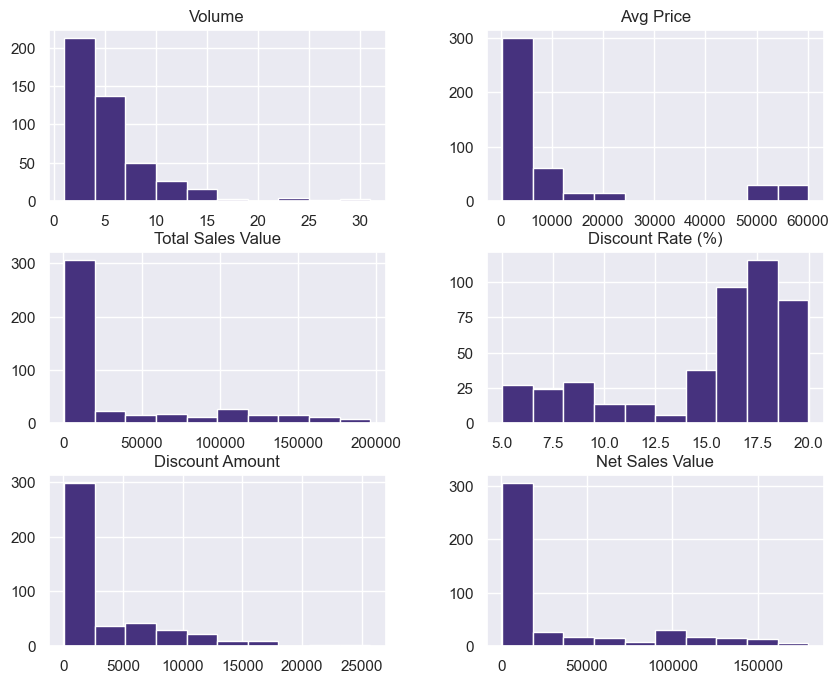

In [43]:
df.hist()

From the above histogram plots we can interpret that except 'Discount Rate(%)' column every other columns are positively skewed which implies that there are outliers present on the upper extreme side whereas the column that is negatively skewed implies presence of outliers on the lower extreme side.

# <u>BOXPLOTS</u>

In [44]:
#code for finding the extremes and inter quartile range
low=[]
up=[]
iqr=[]
def extremes(data,columns):
    for col in columns:
        q1=data[col].quantile(0.25)
        q3=data[col].quantile(0.75)
        IQR=q3-q1
        iqr.append(IQR)
        lower = q1-(1.5*IQR)
        low.append(lower)
        upper = q3+(1.5*IQR)
        up.append(upper)
        

col=['Volume','Avg Price', 'Total Sales Value', 'Discount Rate (%)','Discount Amount', 'Net Sales Value']
extremes(df,col)
data={
    'Fields':col,
    'Lower Extreme':low,
    "Upper Extreme":up,
    "Inter Quartile Range":iqr
}
pd.DataFrame(data)

,Fields,Lower Extreme,Upper Extreme,Inter Quartile Range
0,Volume,-1.500000,10.500000,3.000000
1,Avg Price,-13987.500000,24552.500000,9635.000000
2,Total Sales Value,-73050.000000,128950.000000,50500.000000
3,Discount Rate (%),7.740579,24.339202,4.149656
4,Discount Amount,-6823.594880,12600.549611,4856.036123
5,Net Sales Value,-66266.347664,116316.469161,45645.704206


Text(0.5, 1.0, 'Boxplot for Volume')

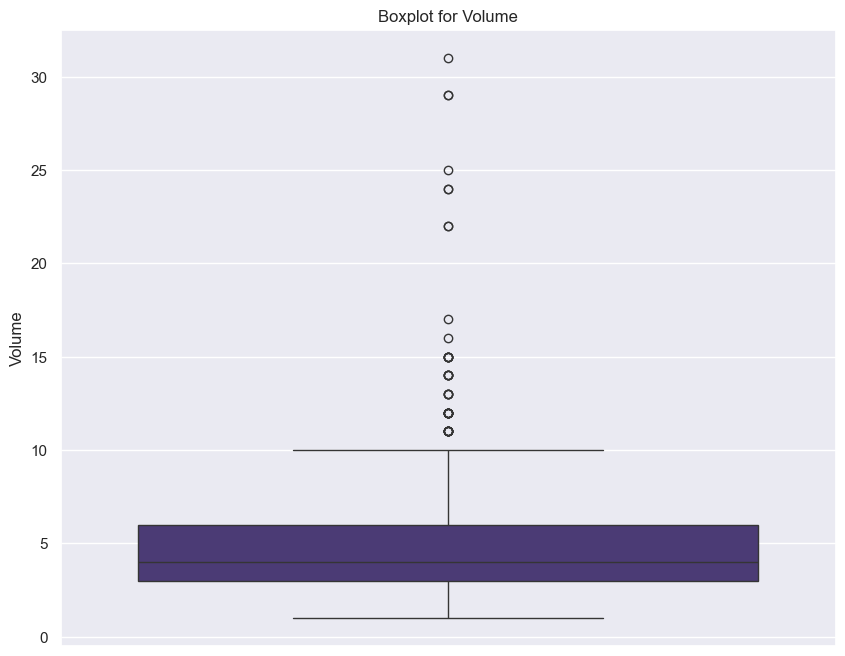

In [45]:
sns.boxplot(df['Volume'])
plt.title("Boxplot for Volume")

From the above boxplot plotted for the 'Volume' column we can interpret that:
- outliers(10) are present on the upper extreme side
- the inter quartile range here is 3
- the lower and upper extremes values here are -1.5 and 10.5 respectively.

Text(0.5, 1.0, 'Boxplot for Avg Price')

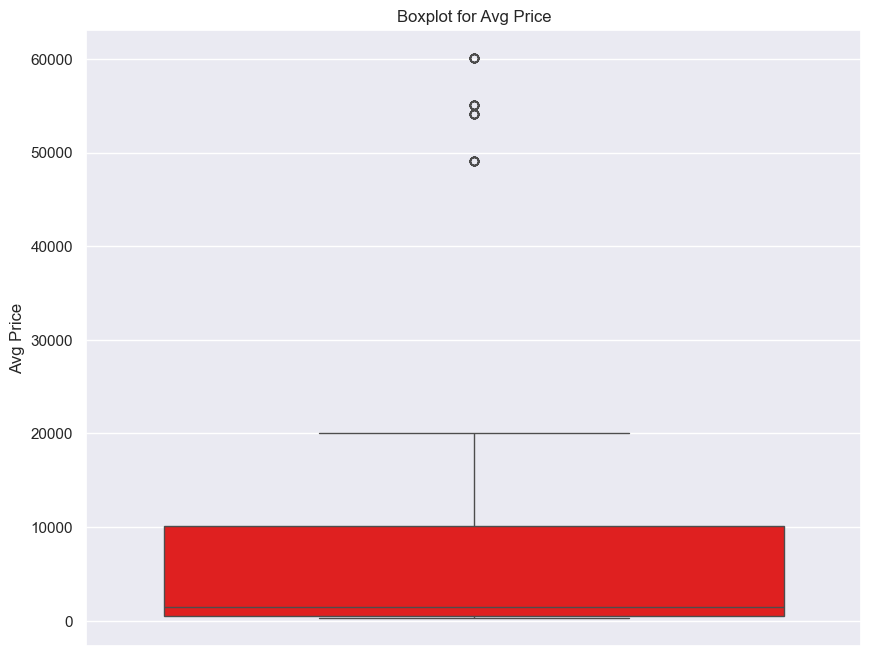

In [46]:
sns.boxplot(df['Avg Price'],color="red")
plt.title("Boxplot for Avg Price")

From the above boxplot plotted for the 'Avg Price' column we can interpret that:
- outliers are present on the upper extreme side
- the inter quartile range here is 9635
- the lower and upper extremes values here are -13987.5 and 24552.5 respectively.

Text(0.5, 1.0, 'Boxplot for Total Sales Value')

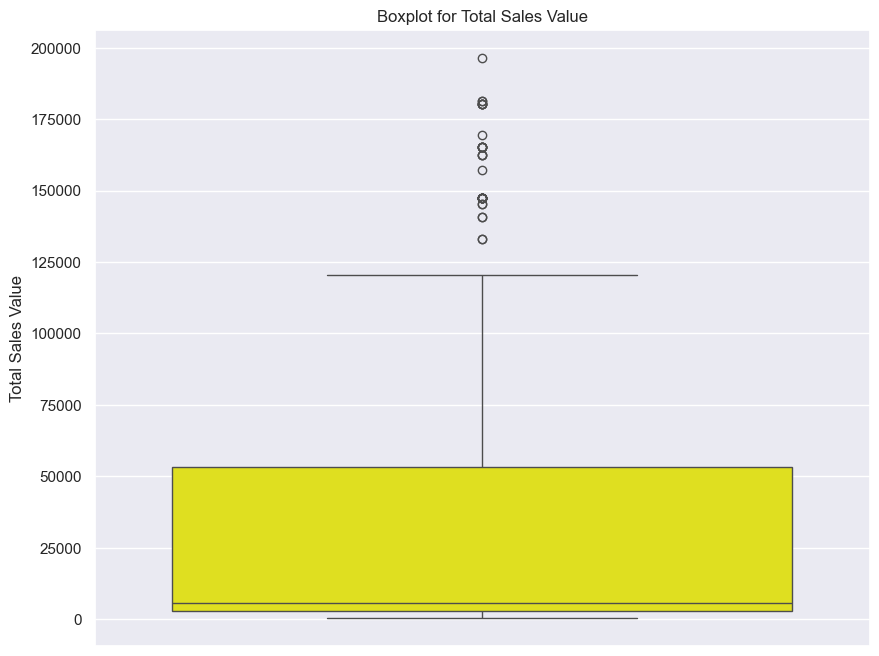

In [47]:
sns.boxplot(df['Total Sales Value'],color="yellow")
plt.title("Boxplot for Total Sales Value")

From the above boxplot plotted for the 'Total Sales Value' column we can interpret that:
- outliers are present on the upper extreme side
- the inter quartile range here is 50500
- the lower and upper extremes values here are -73050 and 128950 respectively.

Text(0.5, 1.0, 'Boxplot for Discount Amount')

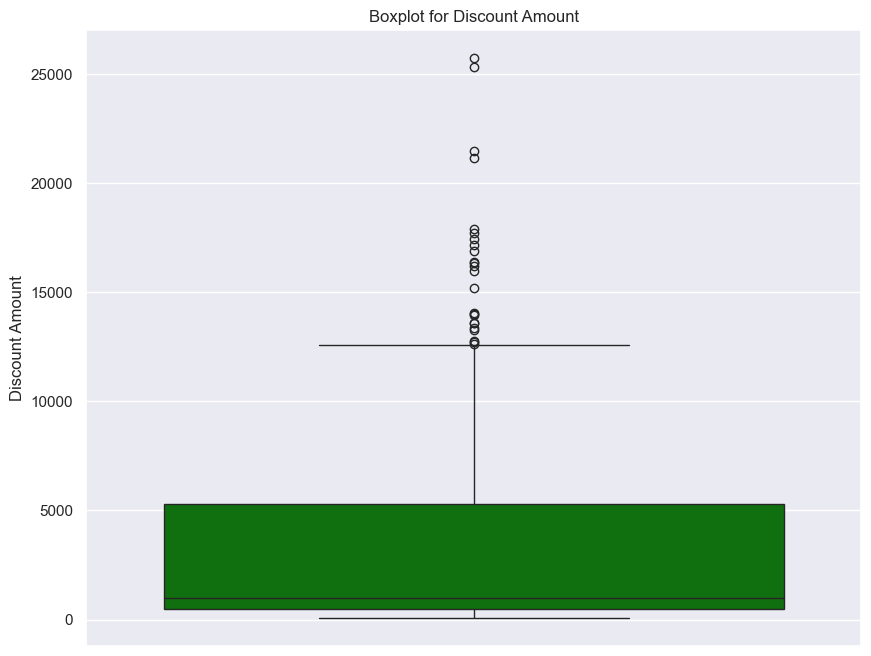

In [48]:
sns.boxplot(df['Discount Amount'],color="green")
plt.title("Boxplot for Discount Amount")

From the above boxplot plotted for the 'Discount Amount' column we can interpret that:
- outliers are present on the upper extreme side
- the inter quartile range here is 4856.03
- the lower and upper extremes values here are -6823.59 and 12600.54 respectively.

Text(0.5, 1.0, 'Boxplot for Discount Rate(%)')

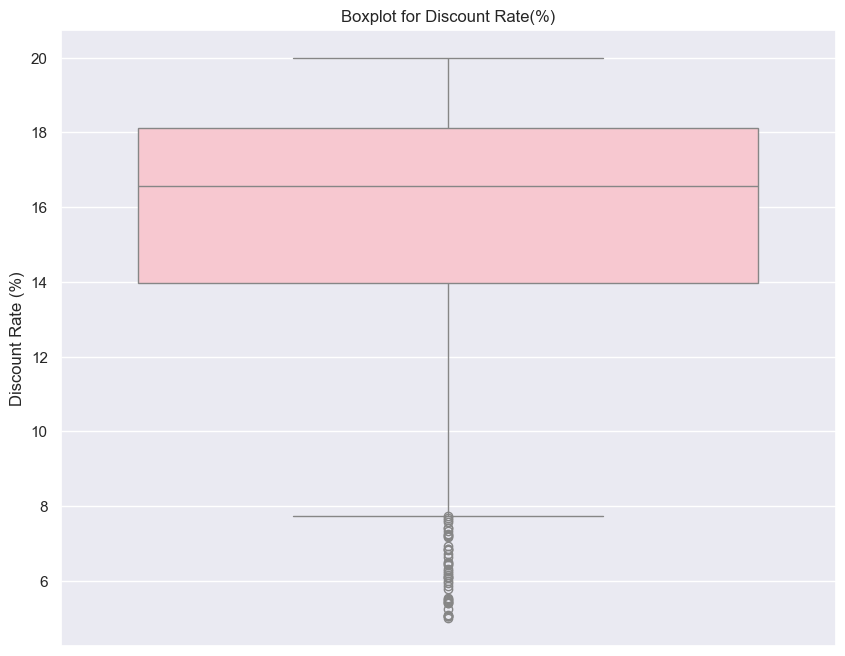

In [49]:
sns.boxplot(df['Discount Rate (%)'],color='pink')
plt.title("Boxplot for Discount Rate(%)")

From the above boxplot plotted for the 'Discount Rate(%)' column we can interpret that:
- outliers are present on the lower extreme side
- the inter quartile range here is 4.14
- the lower and upper extremes values here are 7.74 and 24.33 respectively.

Text(0.5, 1.0, 'Boxplot for Net Sales Value')

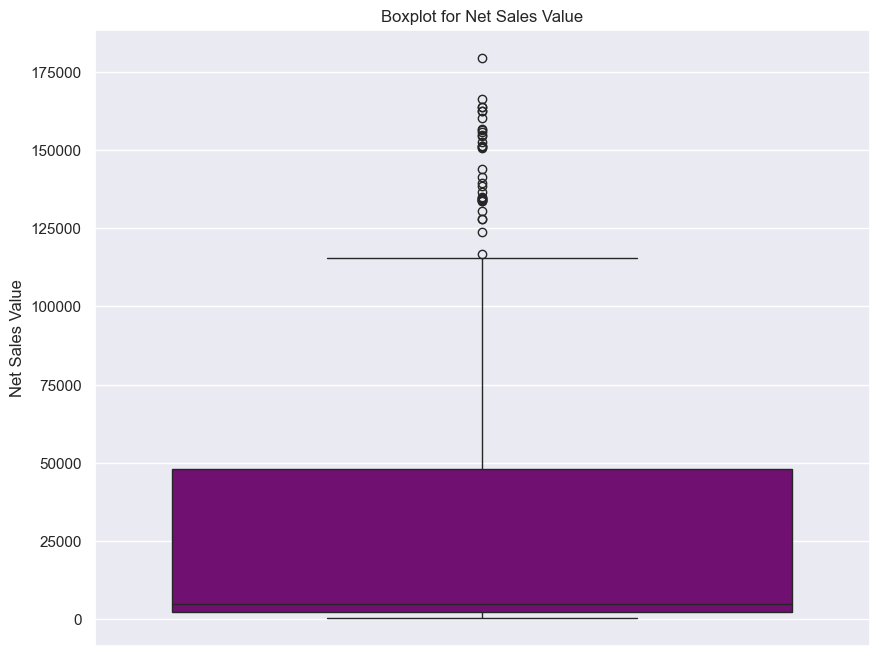

In [50]:
sns.boxplot(df['Net Sales Value'],color='purple')
plt.title("Boxplot for Net Sales Value")

From the above boxplot plotted for the 'Net Sales Value' column we can interpret that:
- outliers are present on upper extreme side
- the inter quartile range here is 45645.70
- the lower and upper extremes values here are -66266.34 and 116316.46 respectively.

# <u>BARPLOTS</u>

Text(0.5, 1.0, 'Bar Plot for Day')

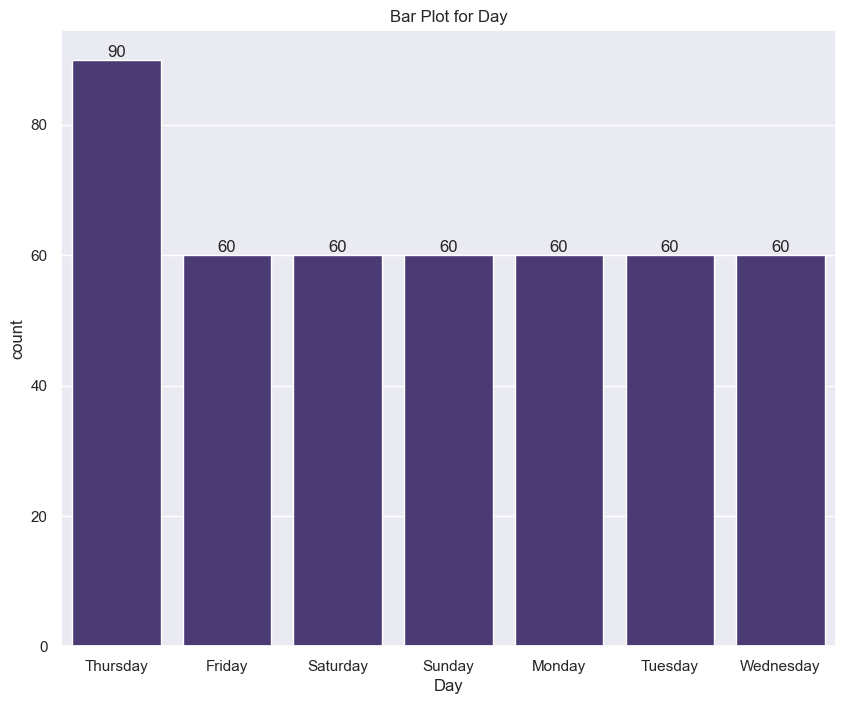

In [51]:
a=sns.barplot(df['Day'].value_counts())
a.bar_label(a.containers[0])
plt.title("Bar Plot for Day")

_"Thursday"_ has the maximum number of sales as compared to other days.Also, Peak days can be leveraged for promotions

Text(0.5, 1.0, 'Bar Plot for City')

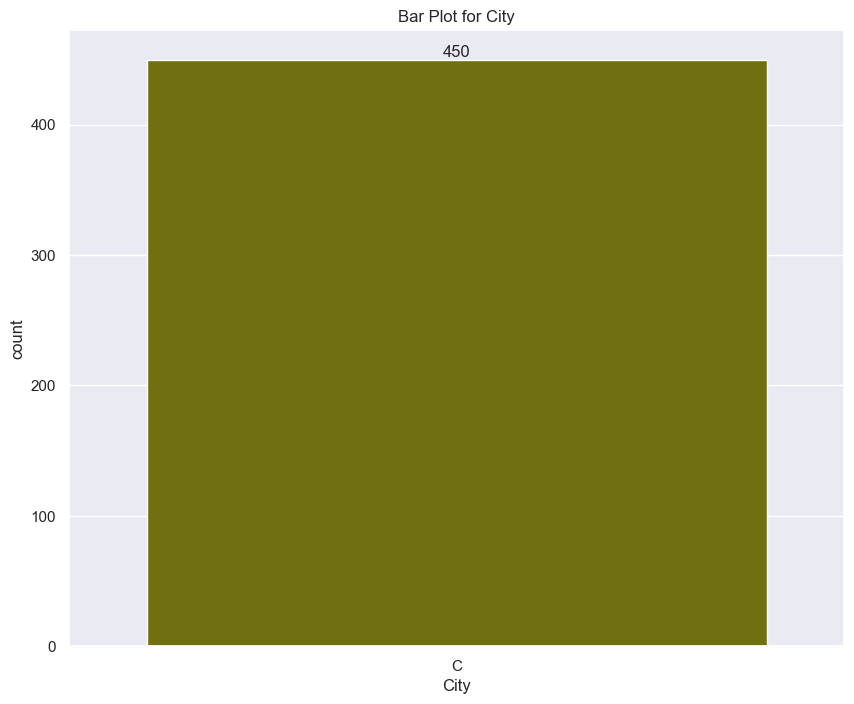

In [52]:
a=sns.barplot(df['City'].value_counts(),color='olive')
a.bar_label(a.containers[0])
plt.title("Bar Plot for City")

Text(0.5, 1.0, 'Bar Plot for BU')

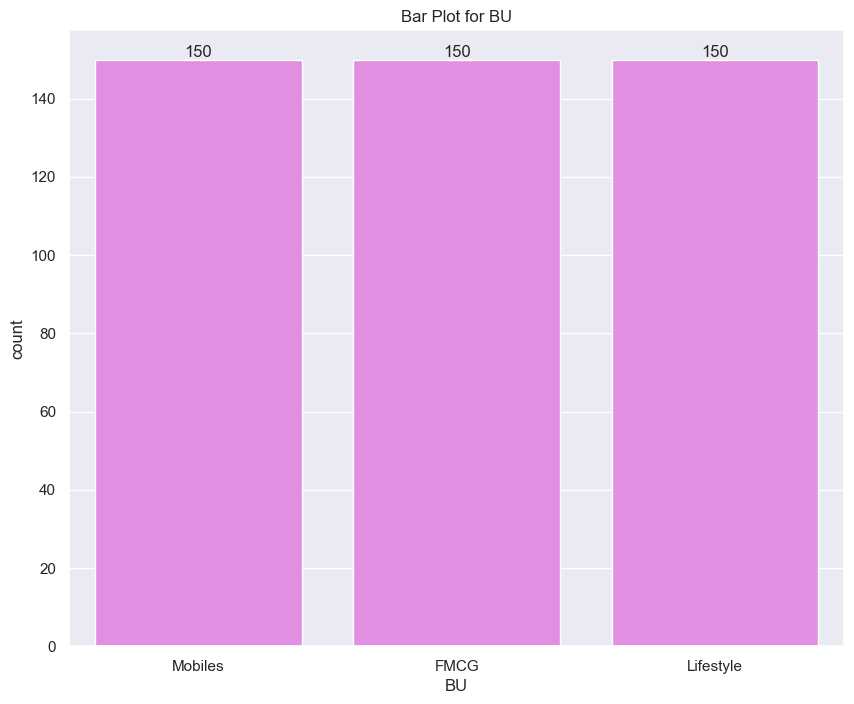

In [53]:
a=sns.barplot(df['BU'].value_counts(),color='Violet')
a.bar_label(a.containers[0])
plt.title("Bar Plot for BU")

From the above plot we can interpret that every business unit(BU) had equal amount of sale.

Text(0.5, 1.0, 'Bar Plot for Brand')

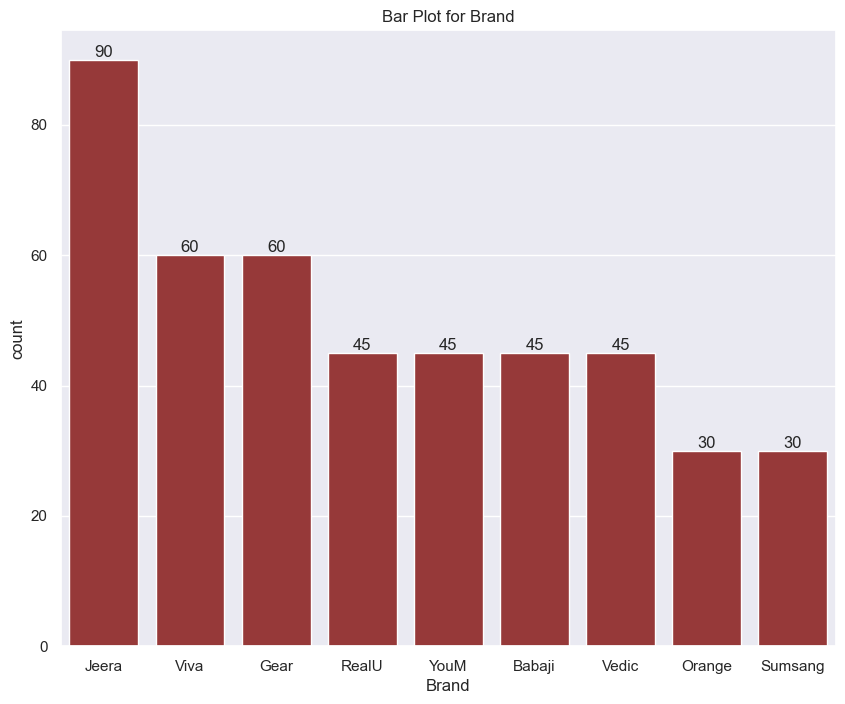

In [54]:
a=sns.barplot(df['Brand'].value_counts(),color='brown')
a.bar_label(a.containers[0])
plt.title("Bar Plot for Brand")

From the above plot, it is observed that _Jeera_ Brand has made the maximum sales. Low performing Brands might need discount or discontinuation

Note: Date is not as useful as cateogrical column and SKU & Model columns have too many unique values. Hence, can be skipped while plotting bar plot

# <u>EDA(Exploratory Data Analysis)</u>

In [55]:
df

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,2,Lifestyle,Jeera,M-Casuals,1300,2600,15.475687,402.367873,2197.632127
446,15-04-2021,Thursday,L07,C,6,Lifestyle,Viva,W-Western,2600,15600,17.057027,2660.896242,12939.103758
447,15-04-2021,Thursday,L08,C,2,Lifestyle,Viva,W-Lounge,1600,3200,18.965550,606.897606,2593.102394
448,15-04-2021,Thursday,L09,C,3,Lifestyle,Jeera,M-Formals,1900,5700,16.793014,957.201826,4742.798174


In [56]:
df.duplicated().sum()
#no duplicate values in the data

np.int64(0)

In [57]:
df.drop(columns=["City"],inplace = True)
# dropped city column since it had only single unique value

In [58]:
df.isna().sum()
#checked for the missing values(no missing values found)

Date                 0
Day                  0
SKU                  0
Volume               0
BU                   0
Brand                0
Model                0
Avg Price            0
Total Sales Value    0
Discount Rate (%)    0
Discount Amount      0
Net Sales Value      0
dtype: int64

In [59]:
# capping
def capping(data,columns):
    for col in columns:
        q1=data[col].quantile(0.25)
        q3=data[col].quantile(0.75)
        IQR=q3-q1
        lower = q1-(1.5*IQR)
        upper = q3+(1.5*IQR)
        df[col]=np.where(df[col]>upper,upper,np.where(df[col]<lower,lower,df[col]))

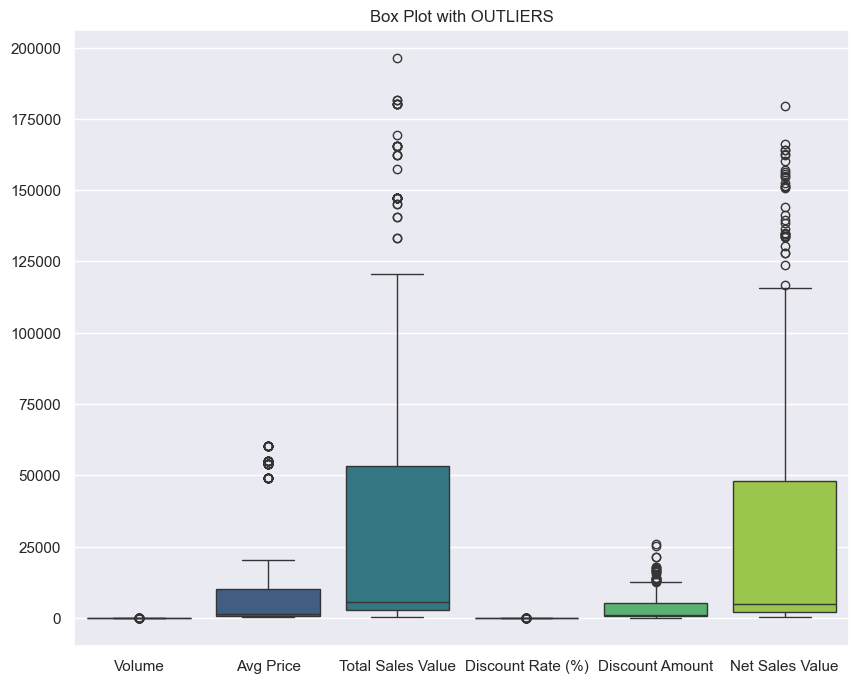

In [60]:
sns.boxplot(df)
plt.title('Box Plot with OUTLIERS')
plt.rcParams['figure.figsize']=(10,8)

In [61]:
col=['Volume','Avg Price','Total Sales Value','Discount Rate (%)','Discount Amount','Net Sales Value']

In [62]:
capping(df,col)

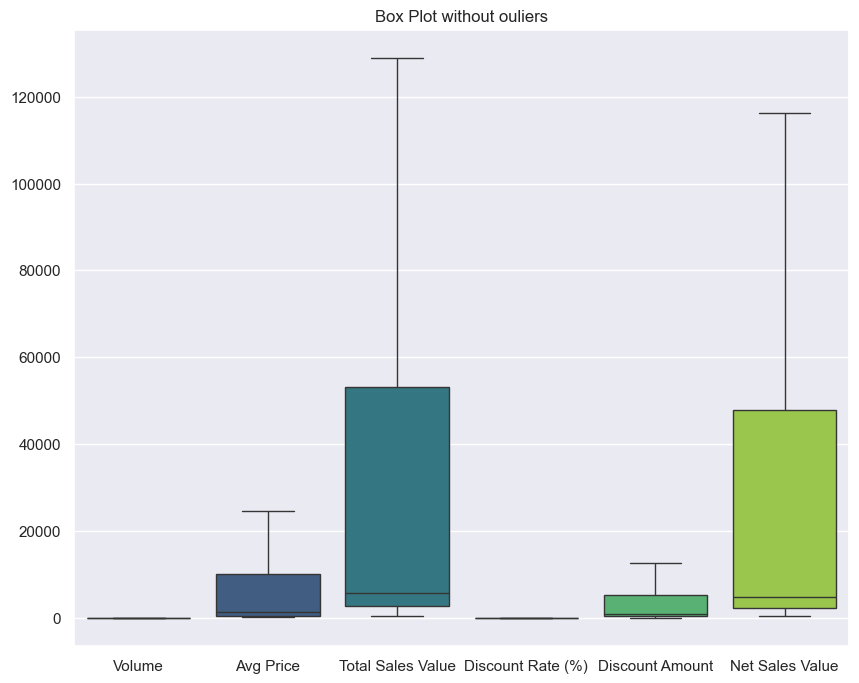

In [63]:
sns.boxplot(df)
plt.title('Box Plot without ouliers')
plt.rcParams['figure.figsize']=(10,8)

<Axes: >

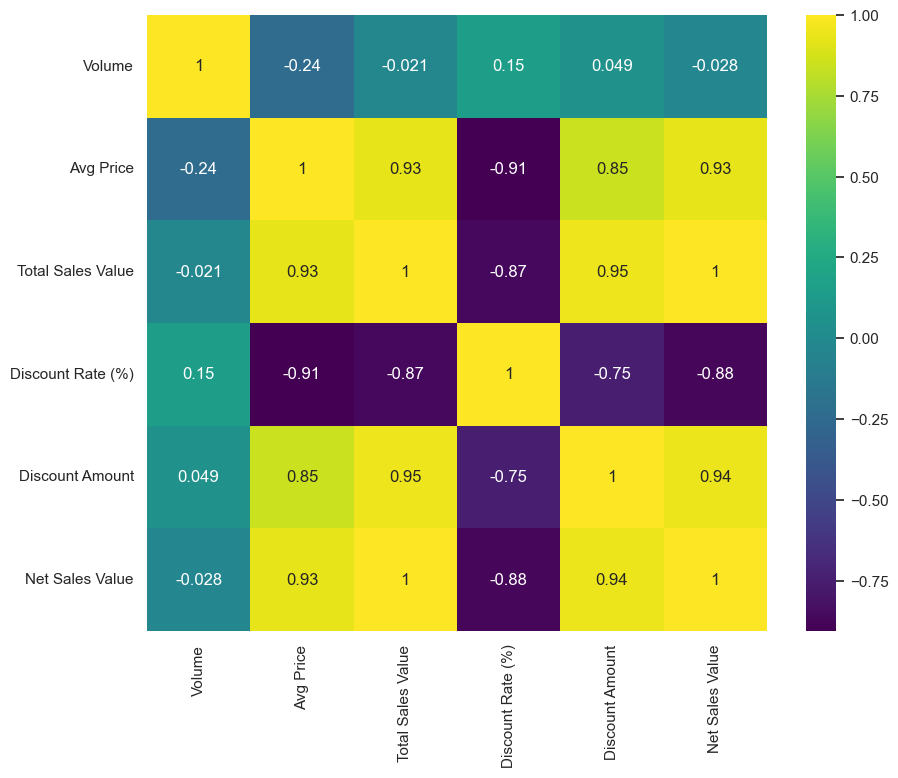

In [64]:
sns.heatmap(df[col].corr(numeric_only=True),annot=True,cmap="viridis")

In [65]:
df.columns

Index(['Date', 'Day', 'SKU', 'Volume', 'BU', 'Brand', 'Model', 'Avg Price',
       'Total Sales Value', 'Discount Rate (%)', 'Discount Amount',
       'Net Sales Value'],
      dtype='object')

# <u>ENCODING<u>
<u><b>Need of One Hot Encoding</b></u>:
One-Hot Encoding (OHE) is a technique used to convert categorical data into a numerical format that machine learning models can process. It is particularly useful when dealing with nominal categorical variables.

In [66]:
cols=['Day', 'SKU','BU', 'Brand', 'Model'] #categorical columns

In [67]:
df.head() #dataset before one hot encoding

,Date,Day,SKU,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,10.5,Mobiles,RealU,RU-10,12100.0,128950.0,11.654820,12600.549611,116316.469161
1,01-04-2021,Thursday,M02,10.0,Mobiles,RealU,RU-9 Plus,10100.0,101000.0,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,7.0,Mobiles,YouM,YM-99,16100.0,112700.0,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,6.0,Mobiles,YouM,YM-99 Plus,20100.0,120600.0,7.740579,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,3.0,Mobiles,YouM,YM-98,8100.0,24300.0,17.995663,4372.946230,19927.053770


In [68]:
dummy=pd.get_dummies(data=df,columns=cols,dtype=int) # converts categorical columns into numerical
dummy.head() #encoded dataset

,Date,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value,Day_Friday,Day_Monday,Day_Saturday,...,Model_Vedic Cream,Model_Vedic Oil,Model_Vedic Shampoo,Model_W-Casuals,Model_W-Inners,Model_W-Lounge,Model_W-Western,Model_YM-98,Model_YM-99,Model_YM-99 Plus
0,01-04-2021,10.5,12100.0,128950.0,11.654820,12600.549611,116316.469161,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,01-04-2021,10.0,10100.0,101000.0,11.560498,11676.102961,89323.897039,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,01-04-2021,7.0,16100.0,112700.0,9.456886,10657.910157,102042.089843,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,01-04-2021,6.0,20100.0,120600.0,7.740579,8364.074702,112235.925298,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,01-04-2021,3.0,8100.0,24300.0,17.995663,4372.946230,19927.053770,0,0,0,...,0,0,0,0,0,0,0,1,0,0


<u>Note</u>: _df_ variable has the actual dataset and the _dummy_ variable has the encoded dataset.

# <u>STANDARDISATION</u>
<b>Standardization</b> is a data preprocessing technique used to transform numerical features to have a mean of 0 and a standard deviation of 1. This ensures that all features contribute equally to a machine learning model, preventing some variables from dominating others due to differences in scale.

In [69]:
unscaled=df.iloc[:,[3,7,8,9,10,11]]
unscaled #before standardization

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,10.5,12100.0,128950.0,11.654820,12600.549611,116316.469161
1,10.0,10100.0,101000.0,11.560498,11676.102961,89323.897039
2,7.0,16100.0,112700.0,9.456886,10657.910157,102042.089843
3,6.0,20100.0,120600.0,7.740579,8364.074702,112235.925298
4,3.0,8100.0,24300.0,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...
445,2.0,1300.0,2600.0,15.475687,402.367873,2197.632127
446,6.0,2600.0,15600.0,17.057027,2660.896242,12939.103758
447,2.0,1600.0,3200.0,18.965550,606.897606,2593.102394
448,3.0,1900.0,5700.0,16.793014,957.201826,4742.798174


In [70]:
sc=StandardScaler()

In [71]:
scaled=pd.DataFrame(sc.fit_transform(df[col]),columns=col)
scaled

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,2.133995,0.653958,2.185257,-0.929603,2.446327,2.159293
1,1.953012,0.422587,1.559089,-0.953669,2.207259,1.497922
2,0.867112,1.116699,1.821206,-1.490400,1.943947,1.809543
3,0.505145,1.579441,1.998190,-1.928310,1.350745,2.059311
4,-0.580756,0.191216,-0.159230,0.688245,0.318611,-0.202434
...,...,...,...,...,...,...
445,-0.942722,-0.595444,-0.645378,0.045280,-0.708209,-0.636840
446,0.505145,-0.445053,-0.354137,0.448755,-0.124137,-0.373653
447,-0.942722,-0.560739,-0.631936,0.935709,-0.655316,-0.627150
448,-0.580756,-0.526033,-0.575928,0.381393,-0.564725,-0.574478


In [72]:
scaled.describe()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
count,4.500000e+02,4.500000e+02,4.500000e+02,4.500000e+02,4.500000e+02,4.500000e+02
mean,-1.223712e-16,-3.947460e-18,3.157968e-17,-3.750087e-17,1.026340e-16,-1.578984e-17
std,1.001113e+00,1.001113e+00,1.001113e+00,1.001113e+00,1.001113e+00,1.001113e+00
min,-1.304689e+00,-7.122863e-01,-6.946649e-01,-1.928310e+00,-7.943740e-01,-6.826743e-01
25%,-5.807556e-01,-6.920414e-01,-6.431377e-01,-3.401511e-01,-6.931858e-01,-6.367274e-01
50%,-2.187888e-01,-5.780913e-01,-5.759283e-01,3.264726e-01,-5.565186e-01,-5.760709e-01
75%,5.051448e-01,4.225870e-01,4.882200e-01,7.186217e-01,5.626195e-01,4.816806e-01
max,2.133995e+00,2.094530e+00,2.185257e+00,1.197709e+00,2.446327e+00,2.159293e+00


![Before and After Standardisation Comparison of data distribution](comparison.jpeg)